# TASK - 5 : THE SPARKS FOUNDATION APRIL'21

**Description** : Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
 As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team. Suggest teams or players a company should endorse for its products.


**Dataset Used **: https://bit.ly/34SRn3b

**Done By :**     **Jhumpa Sarma ,**
                 **Data Science &**
            **Business Amnalytics Intern**
                 

# Import the necessary libraries

In [3]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

# Importing the dataset

## Loading the first dataset

In [4]:
match = pd.read_csv('matches.csv')
print('Dataset has been loaded')

Dataset has been loaded


In [5]:
match.shape  ## Dimensions of the first datset

(756, 18)

In [6]:
match.head() ## Prints the top 5 rows of the dataset

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
match.tail()  ## Prints the bottom 5 rows of the dataset

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


## Information about the first dataset

In [8]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Loading the second dataset

In [10]:
delivery = pd.read_csv('deliveries.csv')
print('Data has been loaded')

Data has been loaded


In [11]:
delivery.shape  ## Printing the dimensions of  second dataset

(179078, 21)

In [12]:
delivery.head()  ## Print the top 5 rows of the dataset

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [13]:
delivery.tail() ## Print the bottom 5 rows of the dataset

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


## Information about the second dataset

In [14]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [15]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Now we can merge the two datasets for better visualisation

In [16]:
## Merging the two datasets
merge = pd.merge(delivery,match, left_on='match_id', right_on ='id')
merge.head(6)
print('Datasets have been merged')

Datasets have been merged


## Information about the merged dataset

In [17]:
merge.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [18]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [19]:
match.id.is_unique

True

In [20]:
## Since id is unique, we can have it as the index.

In [21]:
match.set_index('id', inplace=True)

In [22]:
## Describing the dataset now
match.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


In [23]:
match.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,04/05/19,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


## Describe the data about matches (Data Preprocessing)

In [24]:
match.head() ## Printing the top 5 rows 

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [25]:
match.tail()   ## Printing the bottom 5 rows 

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


## We can observe that :

**1. City has 33 distinct values while venue has 35 distinct values.**

**2. Umpire 1 and Umpire 2 have missing 1 value each while umpire 3 has about 94 % of the values missing.**

**3. Team1 and Team 2 have 14 distinct values.**

**4.Winner has 15 distinct values.**

**5. Also city has missing values.**

## Fill the missing values of City

In [26]:
## Let's find the venues for which the value of city is empty

In [27]:
match[match.city.isnull()][['city' , 'venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


**So, we can replace the missing values with 'Dubai'**

In [28]:
match.city = match.city.fillna('Dubai')

**Umpire 1 and umpire2 have 1 missing value each**

In [29]:
match[(match.umpire1.isnull())| (match.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


**Umpire3 has near about 93 % of the missing values. So, we can drop it**

In [30]:
match = match.drop('umpire3', axis = 1)



# Exploratory Data Analysis



## How many teams played in each season?

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

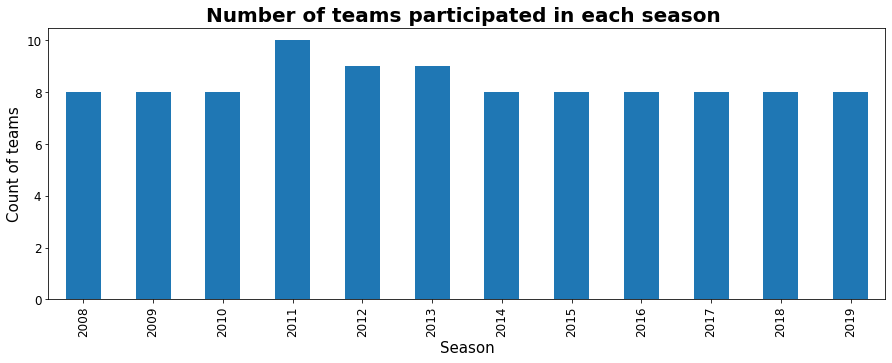

In [31]:
match.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated in each season ",fontsize=20,fontweight="bold")
plt.ylabel("Count of teams", size = 15)
plt.xlabel("Season", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)


## Observations :

**1.In the year 2011, 10 teams have played in the year 2011 while 9 teams have played in the years 2012 and 2013.**

**2.Compared to the other seasons, the maximum no of matches are played in the season 2011-2013.**


# No of matches played in each Season

C:\Users\HP User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

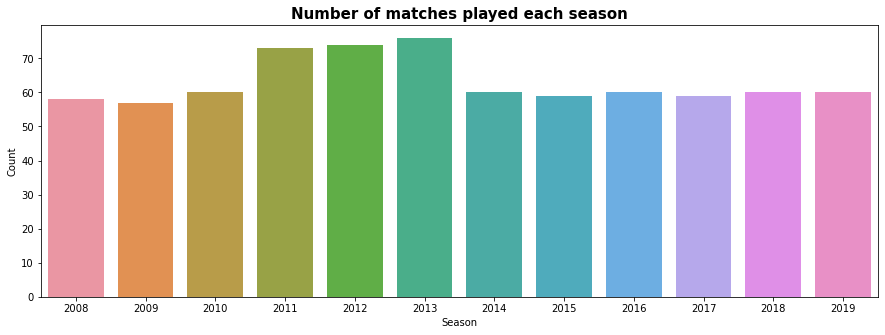

In [32]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = match)
plt.title("Number of matches played each season",fontsize=15,fontweight="bold")
plt.ylabel("Count", size = 10)
plt.xlabel("Season", size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

## Observations:

**1. In the year 2011-2013, more than  70 matches are played.**

**2. All other seasons have the number of matches between 57 - 60 . The maximum number of matches are played in the season 2011-2013**



# Players having most 'Man Of the Match Awards'


In [33]:
print(match['player_of_match'].value_counts())

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
Imran Tahir        1
SW Billings        1
MA Starc           1
MJ Lumb            1
MF Maharoof        1
Name: player_of_match, Length: 226, dtype: int64


Text(0.5, 0, 'Players')

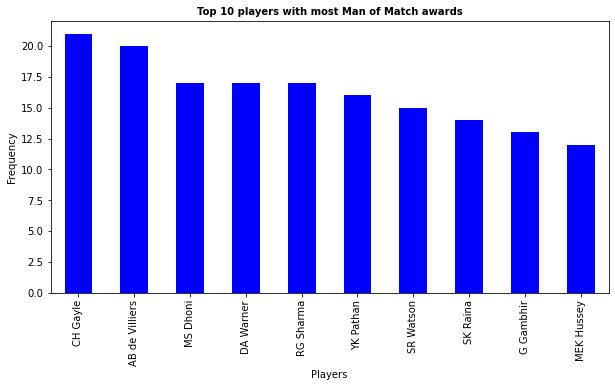

In [34]:
ManofMatch= match['player_of_match'].value_counts()
ManofMatch.head(10).plot(kind = 'bar',figsize=(10,5), fontsize=10, color='blue')
plt.title("Top 10 players with most Man of Match awards",fontsize=10,fontweight="bold")
plt.ylabel("Frequency", size = 10)
plt.xlabel("Players", size = 10)

## Observation:

**CH Gayle , AB de Villiers are amongst the top players securing the most 'Man Of the Match Awards'**



# Which team has won the maximum no. of times in IPL?

In [35]:
winningteams = match[['season','winner']]  ## A dataframe with seasons and winner

In [36]:
win_team = {}                              ## Created a dictionary to get winners of every season
for i in sorted(winningteams.season.unique()):
    win_team[i] = winningteams[winningteams.season == i]['winner'].tail(1).values[0]
    
winner_of_IPL = pd.Series(win_team)
winner_of_IPL = pd.DataFrame(winner_of_IPL, columns=['team'])

(array([], dtype=float64), [])

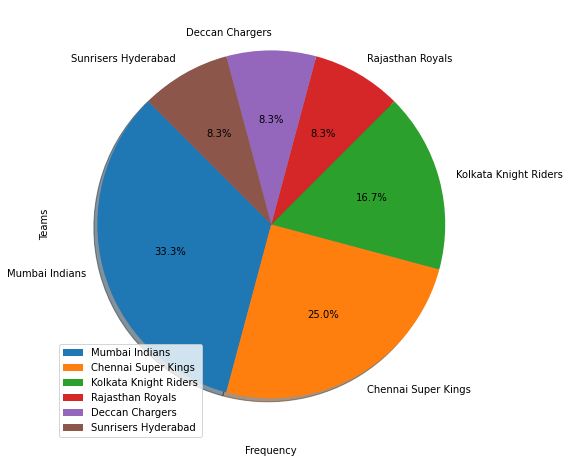

In [37]:
winner_of_IPL['team'].value_counts().plot(kind = 'pie', figsize = (20,8), fontsize=10, autopct= '%3.1f%%', 
                                                shadow=True, startangle=135, legend=True, )
plt.ylabel("Teams", size = 10)
plt.xlabel("Frequency", size = 10)
plt.xticks(size = 15)
plt.yticks(size = 15)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(0, 1, 'Chennai Super Kings'),
  Text(0, 2, 'Kolkata Knight Riders'),
  Text(0, 3, 'Rajasthan Royals'),
  Text(0, 4, 'Deccan Chargers'),
  Text(0, 5, 'Sunrisers Hyderabad')])

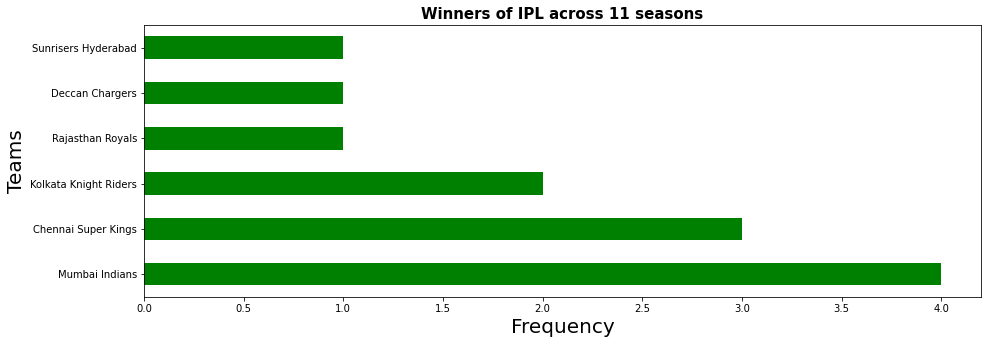

In [38]:
winner_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'green')
plt.title("Winners of IPL across 11 seasons",fontsize=15,fontweight="bold")
plt.ylabel("Teams", size = 20)
plt.xlabel("Frequency", size = 20)
plt.xticks(size = 10)
plt.yticks(size = 10)

## Observation : 

**1.The top three teams who have won IPL include Mumbai Indians and Chennai Super Kings**

**2. They have both won 3 times each followed by KKR who has won 2 times.**

**3.Hyderabad team has also won 2 matches under 2 franchise name - Deccan Chargers and Sunrisers Hyderabad**




# Probability of deciding between batting and fielding after winning the toss

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

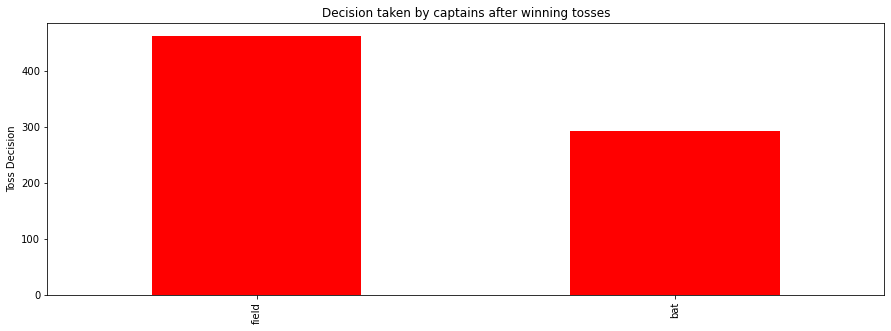

In [39]:
match['toss_decision'].value_counts().plot(kind='bar', fontsize=10, color ='red',figsize=(15,5), )
plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

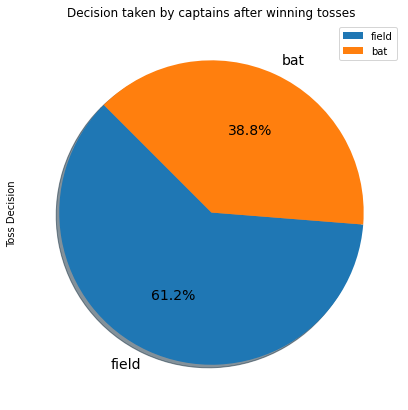

In [40]:
match['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True,)
plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

## Observation :  

**So, we see that around 61.2% of the teams have decided to field first in the matches over the years.**


# Maximum Toss Winners in IPL

<AxesSubplot:title={'center':'Teams that have won the maximum number of tosses'}>

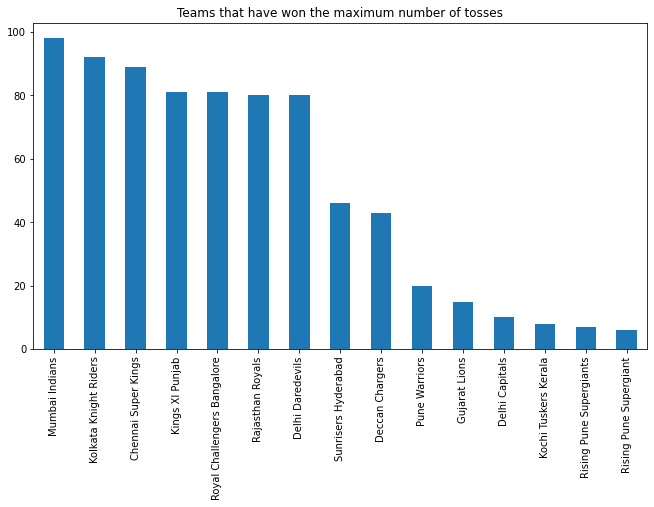

In [41]:
match['toss_winner'].value_counts().plot(kind='bar',figsize=(11,6), title='Teams that have won the maximum number of tosses')

# Observation :

**The teams which have won the maximum number of tosses in IPL include Mumbai Indians, followed by Kolkata Knight Riders and then Chennai Super Kings.**



# Effect of toss decisions on the match result 

C:\Users\HP User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'frequency')

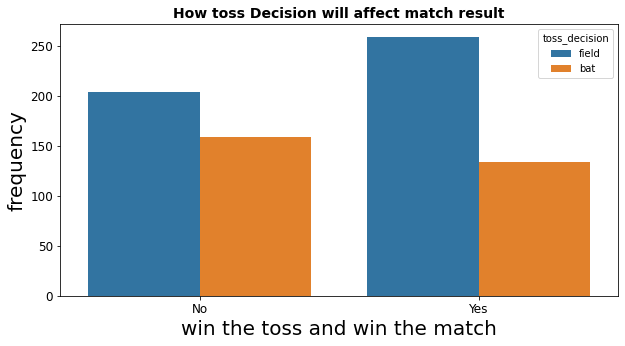

In [42]:
match['toss_win_game_win'] = np.where((match.toss_winner == match.winner),'Yes','No')
plt.figure(figsize = (10,5))
sns.countplot('toss_win_game_win', data=match, hue = 'toss_decision')
plt.title("How toss Decision will affect match result", fontsize=14,fontweight="bold")
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("win the toss and win the match", fontsize = 20)
plt.ylabel("frequency", fontsize = 20)

# Observation :

**Teams who choose to field first after winning the toss are more likely to win the match.**

# Teams and their total scoring runs over the years

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

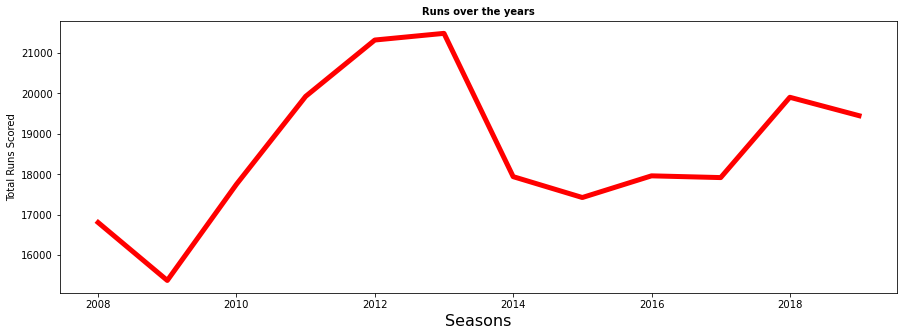

In [43]:
merge.groupby('year')['batsman_runs'].sum().plot(kind = 'line', linewidth = 5, figsize =(15,5),
                                                                                             color = 'red')
plt.title("Runs over the years",fontsize= 10, fontweight = 'bold')
plt.xlabel("Seasons", size = 16)
plt.ylabel("Total Runs Scored", size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

## Observation :

**1. The total runs scored by the IPL Teams have increased from 2008 and the highest number of runs have reached it's peak in the year 2012**

# Top players who score the most number of runs in IPL

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

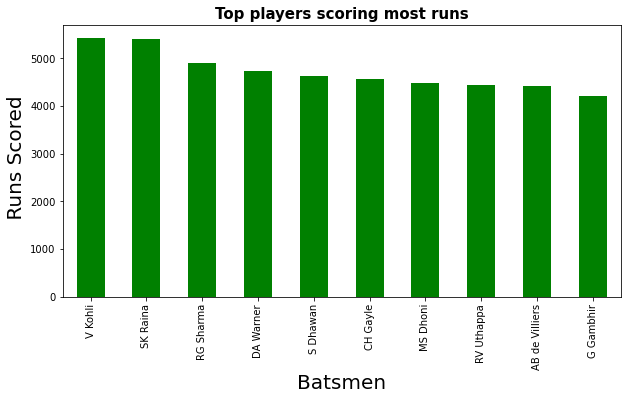

In [44]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green',
                                                                                            figsize = (10,5))
plt.title("Top players scoring most runs", fontsize = 15, fontweight = 'bold')
plt.xlabel("Batsmen", size = 20)
plt.ylabel(" Runs Scored", size = 20)
plt.xticks(size = 10)
plt.yticks(size = 10)

# Observation :

**1.Virat Kohli , Suresh Raina and RG Sharma are among the top batsmen securing most of the runs.**

**2. Except for MS dhoni, the top batsmen are mostly openers of the match.** 

# Players having the highest strike rate over the years

In [47]:
#Let us consider all the players  who have played 11 or more seasons

noofballs = pd.DataFrame(merge.groupby('batsman')['ball'].count()) #number of matches played by each batsman

runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum()) #runs of each batsman

seasons_played = pd.DataFrame(merge.groupby('batsman')['season'].nunique()) 

batsmanstrike_rate = pd.DataFrame({'balls':noofballs['ball'],'run':runs['batsman_runs'],'season':seasons_played['season']})
batsmanstrike_rate.reset_index(inplace = True)

batsmanstrike_rate['strike_rate'] = batsmanstrike_rate['run']/batsmanstrike_rate['balls']*100
higheststrike_rate = batsmanstrike_rate[batsmanstrike_rate.season.isin([11,12])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

higheststrike_rate.head(11)

,season,batsman,strike_rate
26,12,AB de Villiers,148.740343
92,11,CH Gayle,145.640370
509,12,YK Pathan,138.860326
444,11,SR Watson,136.945813
290,12,MS Dhoni,134.930681
428,12,SK Raina,133.902077
166,12,Harbhajan Singh,131.962025
486,12,V Kohli,129.042983
501,12,WP Saha,128.798842
367,12,RG Sharma,128.773585


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

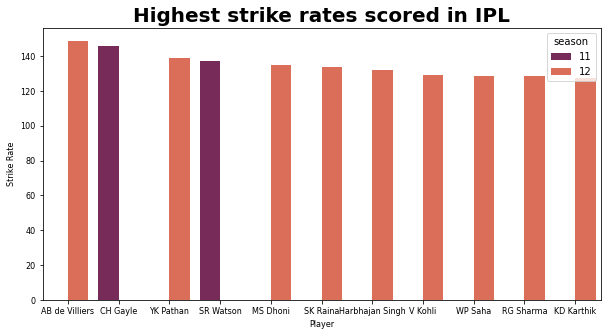

In [48]:
plt.figure(figsize = (10,5))
sns.barplot(x='batsman', y='strike_rate', data = higheststrike_rate.head(11), hue = 'season', palette = 'rocket')
plt.title("Highest strike rates scored in IPL",fontsize= 20, fontweight = 'bold')
plt.xlabel("Player", size = 8)
plt.ylabel("Strike Rate", size = 8)
plt.xticks(size = 8)
plt.yticks(size = 8)

# Observations :

**1. As seen , Ab de Villiers and CH Gayle have the highest strike rates scored in IPL.**

**2. Harbajan Singh has a greater strike rate than Virat Kohli as well as Rohit Sharma.**

**3. Players having higher strike rates include YK Pathan , SR Watson and MS Dhoni.**



# Players who have taken the maximum number of wickets in IPL

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

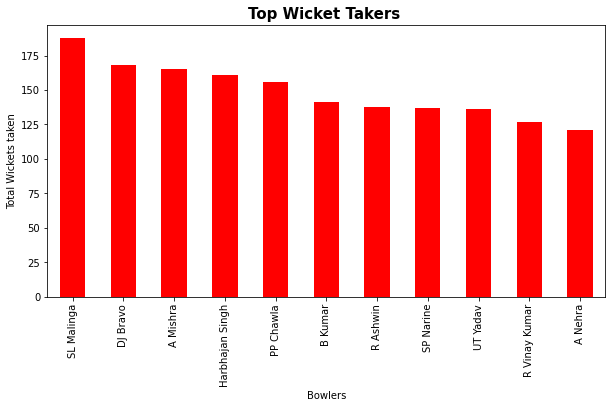

In [149]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(11).plot(kind = 'bar', color = 'red', figsize = (10,5))
plt.title("Top Wicket Takers ", fontsize = 15, fontweight = 'bold')
plt.xlabel("Bowlers", size = 10)
plt.ylabel("Total Wickets taken", size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

# Observations :

   **1. SL Malinga has taken the highest number of wickets so far followed by DJ Bravo, A Mishra and Harbhajan Singh.**
   
   **2. The top wicket takers include fast and medium pacers as well as spinners.**
   
   **3. Harbhajan Singh is found to have both a higher striking rate interms of runs and a good wicket taker.**
   


# Let's find out the number of extras of bowlers

In [152]:
extras = delivery[delivery['extra_runs']!=0]['bowler'].value_counts()[:11]
print(extras)

SL Malinga    221
P Kumar       185
UT Yadav      180
DJ Bravo      176
B Kumar       162
SR Watson     155
I Sharma      151
RP Singh      145
DW Steyn      139
R Ashwin      133
Z Khan        132
Name: bowler, dtype: int64


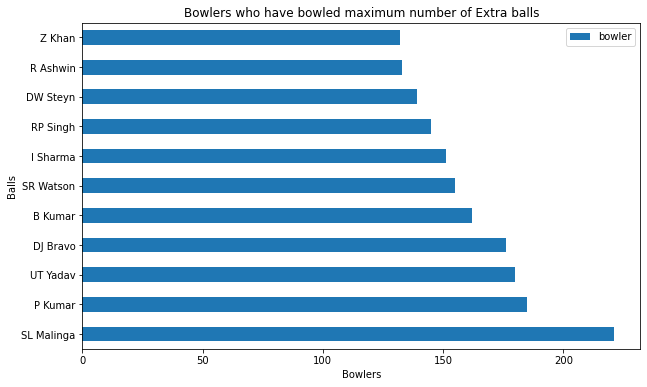

In [170]:
## Let us visualsize it with the help of a  graph

extras.plot(kind='barh', figsize=(10,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('Bowlers')
plt.ylabel('Balls')
plt.show()

extras = pd.DataFrame(extra)


# Observations :

**Bowlers who have bowled the maximum no. of extra balls include SL Malinga, followed by P Kumar, UT Yadav and DJ Bravo**


#  Venues/ Stadiums  that have hosted  the highest number of IPL Matches


Text(0.5, 0, 'Frequency')

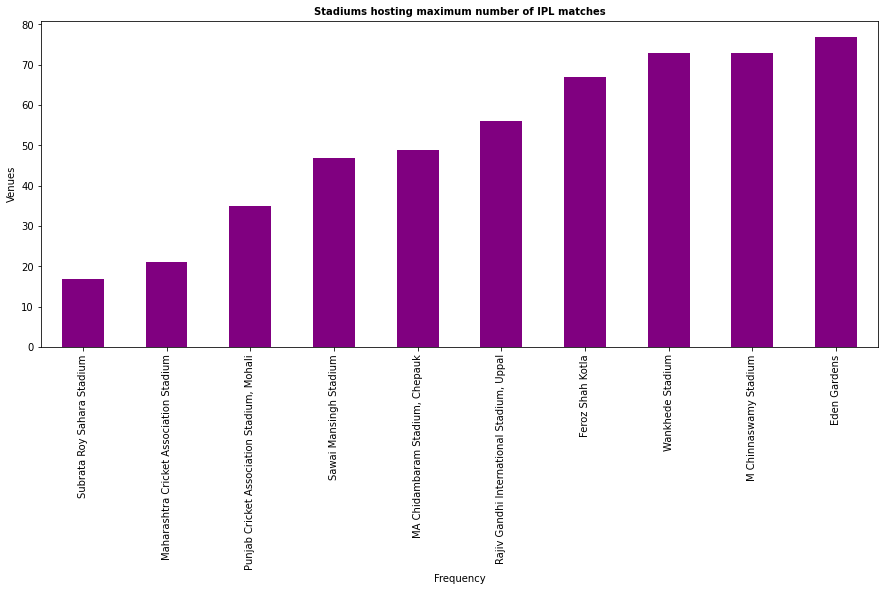

In [163]:
match.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'bar',figsize=(15,6), fontsize=10, color='purple')
plt.title("Stadiums hosting maximum number of IPL matches",fontsize=10,fontweight="bold")
plt.ylabel("Venues", size = 10)
plt.xlabel("Frequency", size = 10)

# Observation :

**The highest number of matches have been held at Eden Gardens followed by M Chinnaswamy Stadium and Wankhede Stadium**



# Important  Observations :


 ## Most successful team, players and factors contributing to win or loss of a team:
 
 **a. The highest number of match played in IPL season was 2013, 2014 and 2015.**
 
 **b. Teams which Bowl first has higher chances of winning then the team which bat first.**
 
 **c. After winning toss more teams decide to do fielding first.**

**d.If a team wins a toss choose to field first as it has highest probablity of winning**

**e.Chris Gayle has won the maximum number of players of the match title.**

**f.Eden Gardens has hosted the maximum number of IPL matches.**




## Suggest a team and its players a company  should endorse for it's products :

**a.If the company is looking for a batsman with exceptional runs, they should  go for Chris Gayle, AB deVillers, Virat Kohli ,R Sharma.**
 
 **b.If the company  needs the best finisher having good strike rate then should go for Chris  Gayle,KA Pollard, DA Warner, SR Watson.**
 
**c.If the company needs a experienced bowler then  they should go for R Ashwin, SL Malinga, DJ Bravo , Harbhajan Singh ,A Mishra.**









# Thank You!!



# @GRIP